## KNN - K Nearest Neighbor (K-近郊演算法) 
* 監督式學習
* 適用於分類問題 & 迴歸預測 問題


#### 優點
* 對異常值有較高的容忍度

#### 缺點
* 計算量較大, 對記憶體需求較高
* 每次對一個未標記樣本進行分類時,需要全部計算一遍距離

In [7]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[-2,2],[2,2],[0,4]]
X , Y = make_blobs(n_samples = 40 , centers = centers, random_state = 0 , cluster_std =0.5) 
print(X)
print(Y)

[[ 1.1468649   2.9753877 ]
 [ 0.03325861  4.15123595]
 [-0.01409111  4.21416594]
 [-3.27649491  2.3268093 ]
 [-1.51063101  3.1204466 ]
 [-0.31716105  3.81862942]
 [-1.77806838  2.16683716]
 [ 2.07747371  2.18908126]
 [-1.61948114  2.06083751]
 [ 1.55610713  1.00960177]
 [-1.84346615  1.57295213]
 [-1.92797821  2.72713675]
 [ 1.37360232  2.38874518]
 [ 1.74517391  1.78096285]
 [-0.45364918  4.0259727 ]
 [ 2.61514534  2.60118992]
 [ 1.82604393  2.07817448]
 [-0.40657314  3.1368587 ]
 [-1.5677819   1.62891749]
 [-0.81509917  4.23139113]
 [ 1.55226672  2.19345125]
 [-2.05160943  2.20529925]
 [-1.11797383  2.2000786 ]
 [ 2.76638961  2.73467938]
 [-0.86512269  1.27281716]
 [ 0.36454528  4.06449146]
 [ 1.47572352  1.28999103]
 [ 0.20117082  3.65759495]
 [ 0.56970034  3.38258709]
 [ 1.74459743  1.40968391]
 [ 0.08871307  3.79910953]
 [ 1.80633659  1.84884862]
 [-1.25296046  1.89742087]
 [-0.15577627  4.02808267]
 [-0.43539857  3.71057517]
 [-1.52495579  1.9243214 ]
 [-1.066221    1.51136106]
 

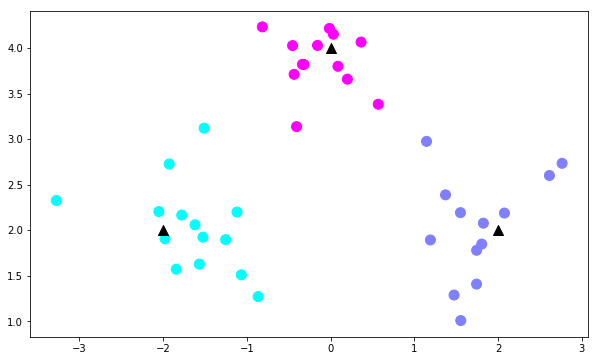

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, cmap='cool') #畫出樣本分布
c = np.array(centers)
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='black') #劃出中心點


#### 使用 KNN 進行分類 

In [3]:
from sklearn.neighbors import KNeighborsClassifier

KNN - KNeighborsClassifier 分類演算法　 https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [4]:
# 訓練模型
k = 10 
clf = KNeighborsClassifier(n_neighbors=k) 
clf.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [11]:
# 進行新樣本預測

sample_x = np.array([3, 5]).reshape(1, -1)
sample_y = clf.predict(sample_x)
neighbors = clf.kneighbors(sample_x, return_distance=False);
print("屬於類別 : " ,sample_y)
print(neighbors)


屬於類別 :  [1]
[[23 15  0 25 28  7 12  1 27  2]]


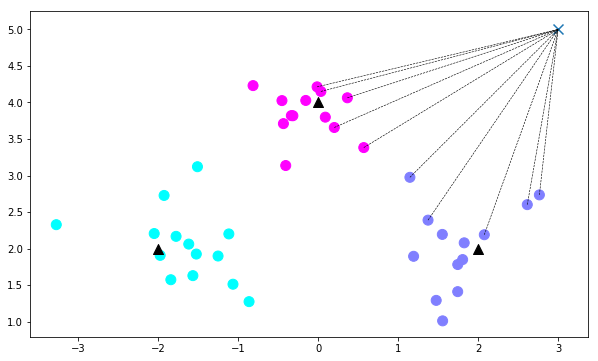

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, cmap='cool')    # 劃出sample
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='k')   # 劃出中心點
plt.scatter(sample_x[0][0], sample_x[0][1], marker="x", s=100, cmap='cool')    #帶預測的點 

for i in neighbors[0]:
    # 與預測點距離最近的 N個樣本連線
    plt.plot([X[i][0], sample_x[0][0]], [X[i][1], sample_x[0][1]],'k--', linewidth=0.6);

#### 使用 KNN 進行迴歸預測

In [7]:
from sklearn.neighbors import KNeighborsRegressor

KNN - KNeighborsRegressor　迴歸演算法　https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [16]:
import matplotlib.pyplot as plt
import numpy as np

n_dots = 40
X = 5 * np.random.rand(n_dots, 1)
y = np.cos(X).ravel()


y += 0.3 * np.random.rand(n_dots) + 0.1

In [17]:
# 訓練模型
from sklearn.neighbors import KNeighborsRegressor
k = 10
knn = KNeighborsRegressor(k)
knn.fit(X, y);

In [18]:
# 生成足夠密集的點進行預測
T = np.linspace(0, 10, 100)[:, np.newaxis]
print(T)
y_pred = knn.predict(T)
knn.score(X, y)

[[ 0.        ]
 [ 0.1010101 ]
 [ 0.2020202 ]
 [ 0.3030303 ]
 [ 0.4040404 ]
 [ 0.50505051]
 [ 0.60606061]
 [ 0.70707071]
 [ 0.80808081]
 [ 0.90909091]
 [ 1.01010101]
 [ 1.11111111]
 [ 1.21212121]
 [ 1.31313131]
 [ 1.41414141]
 [ 1.51515152]
 [ 1.61616162]
 [ 1.71717172]
 [ 1.81818182]
 [ 1.91919192]
 [ 2.02020202]
 [ 2.12121212]
 [ 2.22222222]
 [ 2.32323232]
 [ 2.42424242]
 [ 2.52525253]
 [ 2.62626263]
 [ 2.72727273]
 [ 2.82828283]
 [ 2.92929293]
 [ 3.03030303]
 [ 3.13131313]
 [ 3.23232323]
 [ 3.33333333]
 [ 3.43434343]
 [ 3.53535354]
 [ 3.63636364]
 [ 3.73737374]
 [ 3.83838384]
 [ 3.93939394]
 [ 4.04040404]
 [ 4.14141414]
 [ 4.24242424]
 [ 4.34343434]
 [ 4.44444444]
 [ 4.54545455]
 [ 4.64646465]
 [ 4.74747475]
 [ 4.84848485]
 [ 4.94949495]
 [ 5.05050505]
 [ 5.15151515]
 [ 5.25252525]
 [ 5.35353535]
 [ 5.45454545]
 [ 5.55555556]
 [ 5.65656566]
 [ 5.75757576]
 [ 5.85858586]
 [ 5.95959596]
 [ 6.06060606]
 [ 6.16161616]
 [ 6.26262626]
 [ 6.36363636]
 [ 6.46464646]
 [ 6.56565657]
 [ 6.66666

0.9225995539321187

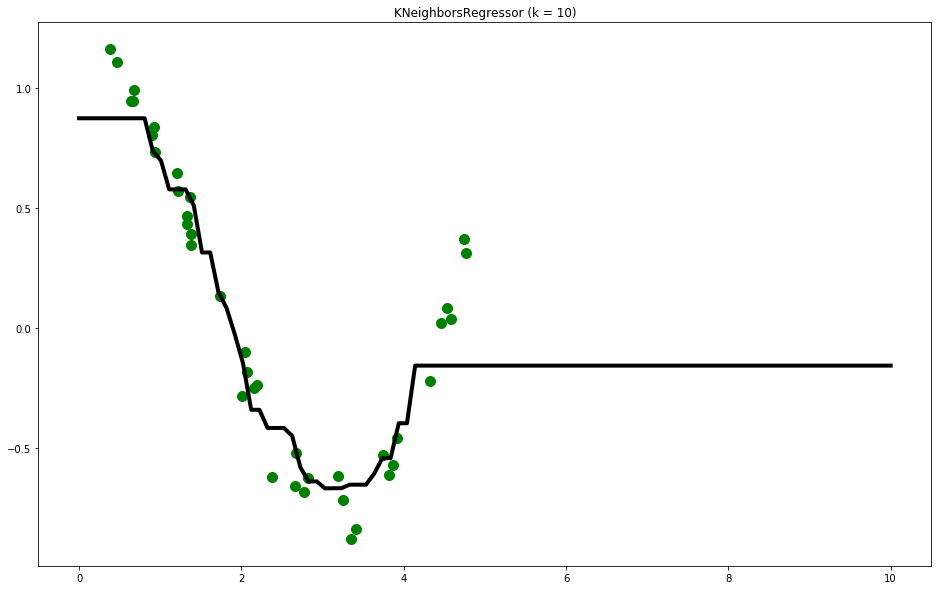

In [21]:
# 画出拟合曲线
plt.figure(figsize=(16, 10))
plt.scatter(X, y, c='g', label='data', s=100)         # 劃出訓練樣本
plt.plot(T, y_pred, c='k', label='prediction', lw=4)  # 劃出擬合曲線
plt.title("KNeighborsRegressor (k = %i)" % k)
plt.show()

#### 糖尿病預測

In [3]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [6]:
X = data.iloc[:,0:8]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [7]:
Y =data.iloc[:,8]
Y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test , y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [11]:
print(y_train.shape)
print(y_test.shape)

(614,)
(154,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
test_score = model.score(X_test,y_test)
test_score

0.7337662337662337

In [15]:
train_score = model.score(X_train,y_train)
train_score

0.7947882736156352

In [19]:
# 預測新數據
x = model.predict([[6,148,72,35,0,33.6,0.627,50]])
print(x[0])

0


In [30]:
model.predict(X_test)

import collections
collections.Counter(model.predict(X_test))

Counter({0: 107, 1: 47})

In [25]:
y_test

646    1
115    1
292    1
204    0
231    1
447    0
704    0
123    0
360    1
608    0
732    1
465    0
163    0
471    0
19     1
562    0
234    0
121    0
300    1
666    1
56     1
624    0
341    0
435    1
597    0
554    0
310    0
663    1
398    0
156    0
      ..
686    0
568    0
295    0
172    0
380    0
216    1
416    0
512    0
189    1
385    0
446    0
475    0
386    1
89     0
10     0
544    0
127    0
751    0
47     0
354    0
288    0
560    1
695    1
366    1
578    0
408    1
402    1
588    1
135    0
117    0
Name: Outcome, Length: 154, dtype: int64